### Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Hachem_Thesis/Data/df_final.xlsx'
df = pd.read_excel(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,appid,name,developer,publisher,owners,average_forever_playtime,all_time_peak,Tags,Languages,Initial Price,Genre,Overall Review Summary,Total Reviews,Achievement Count,DLC Count,DLC Names
0,1623730,Palworld,Pocketpair,Pocketpair,"50,000,000 .. 100,000,000",2760,2101535.0,"Open World, Multiplayer, Survival, Creature Co...","English, Simplified Chinese, Traditional Chine...",2999,"Action, Adventure, Indie, RPG, Early Access",Very Positive,277739,31,1,Palworld - Soundtrack
1,252490,Rust,Facepunch Studios,Facepunch Studios,"50,000,000 .. 100,000,000",22671,244394.0,"Survival, Crafting, Multiplayer, Open World, O...","English, French, Italian, German, Spanish - Sp...",3999,"Action, Adventure, Indie, Massively Multiplaye...",Very Positive,920816,92,4,"Rust - Instruments Pack, Rust - Sunburn Pack, ..."
2,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,"50,000,000 .. 100,000,000",26901,112648.0,"Free to Play, Survival, Zombies, Multiplayer, ...",English,0,"Action, Adventure, Casual, Indie, Free To Play",Very Positive,546799,77,1,Unturned - Permanent Gold Upgrade
3,105600,Terraria,Re-Logic,Re-Logic,"20,000,000 .. 50,000,000",7353,486918.0,"Open World Survival Craft, Sandbox, Survival, ...","English, French, Italian, German, Spanish - Sp...",999,"Action, Adventure, Indie, RPG",Overwhelmingly Positive,1065834,115,2,"Terraria: Official Soundtrack, Terraria: Other..."
4,4000,Garry's Mod,Facepunch Studios,Valve,"20,000,000 .. 50,000,000",12785,73750.0,"Sandbox, Moddable, Multiplayer, Physics, Build...","English, French, Italian, German, Spanish - Sp...",999,"Casual, Indie, Simulation",Overwhelmingly Positive,948804,29,0,No DLC


### Check for missing values

In [3]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)



name                        4
developer                  20
publisher                  33
all_time_peak             272
Genre                      19
Overall Review Summary      2
dtype: int64


In [4]:
df['name'].fillna('Unknown', inplace=True)
df['developer'].fillna('Unknown', inplace=True)
df['publisher'].fillna('Unknown', inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Overall Review Summary'].fillna('Unknown', inplace=True)
df = df[(df['all_time_peak'] >= 30)].dropna()



<ipython-input-4-13f72b9c7977>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
<ipython-input-4-13f72b9c7977>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

### First treatment of Genre, Owners and Review columns

In [5]:
# Replace "Free To Play" and "FreetoPlay" with "F2P" in the Genre column
df['Genre'] = df['Genre'].replace({'Free To Play': 'F2P', 'FreetoPlay': 'F2P'}, regex=True)

# Remove instances of "Indie" from both the Genre and Tags columns
df['Genre'] = df['Genre'].str.replace('Indie', '', regex=False)
df['Tags'] = df['Tags'].str.replace('Indie', '', regex=False)

# Fill missing or empty values in the Genre column with "Unknown"
df['Genre'] = df['Genre'].fillna('Unknown')
df['Genre'] = df['Genre'].replace('', 'Unknown')  # Handle any remaining empty strings


valid_review_summaries = {
    'Overwhelmingly Negative', 'Very Negative', 'Negative', 'Mostly Negative',
    'Mixed', 'Mostly Positive', 'Positive', 'Very Positive', 'Overwhelmingly Positive'
}

# Replacing invalid review summaries with 'no_review'
df['Overall Review Summary'] = df['Overall Review Summary'].apply(lambda x: x if x in valid_review_summaries else 'no_review')


In [6]:
df['owners'] = df['owners'].astype('category')

# Verifying the conversion
df['owners'].dtype, df['owners'].unique()

(CategoricalDtype(categories=['0 .. 20,000', '1,000,000 .. 2,000,000',
                   '10,000,000 .. 20,000,000', '100,000 .. 200,000',
                   '2,000,000 .. 5,000,000', '20,000 .. 50,000',
                   '20,000,000 .. 50,000,000', '200,000 .. 500,000',
                   '5,000,000 .. 10,000,000', '50,000 .. 100,000',
                   '50,000,000 .. 100,000,000', '500,000 .. 1,000,000'],
 , ordered=False, categories_dtype=object),
 ['50,000,000 .. 100,000,000', '20,000,000 .. 50,000,000', '10,000,000 .. 20,000,000', '5,000,000 .. 10,000,000', '2,000,000 .. 5,000,000', ..., '200,000 .. 500,000', '100,000 .. 200,000', '50,000 .. 100,000', '20,000 .. 50,000', '0 .. 20,000']
 Length: 12
 Categories (12, object): ['0 .. 20,000', '1,000,000 .. 2,000,000', '10,000,000 .. 20,000,000',
                           '100,000 .. 200,000', ..., '5,000,000 .. 10,000,000', '50,000 .. 100,000',
                           '50,000,000 .. 100,000,000', '500,000 .. 1,000,000'])

### Investigating variable distribution

In [7]:
continuous_vars = ['average_forever_playtime', 'all_time_peak', 'Initial Price', 'Total Reviews', 'Achievement Count', 'DLC Count']
continuous_summary = df[continuous_vars].describe()

print("\nSummary Statistics for Continuous Variables:")
display(continuous_summary)


Summary Statistics for Continuous Variables:


,average_forever_playtime,all_time_peak,Initial Price,Total Reviews,Achievement Count,DLC Count
count,6385.000000,6.385000e+03,6385.000000,6.385000e+03,6385.000000,6385.000000
mean,568.783085,4.128356e+03,1012.725450,6.698698e+03,46.861864,1.251370
std,2587.545343,3.297354e+04,909.679024,3.732365e+04,237.030477,6.215753
min,10.000000,3.000000e+01,0.000000,0.000000e+00,0.000000,0.000000
25%,114.000000,1.770000e+02,199.000000,2.000000e+02,7.000000,0.000000
50%,221.000000,5.900000e+02,899.000000,7.500000e+02,21.000000,0.000000
75%,373.000000,1.869000e+03,1499.000000,2.774000e+03,39.000000,1.000000
max,124564.000000,2.101535e+06,6999.000000,1.065834e+06,5394.000000,200.000000


In [8]:
df= df[df['Initial Price'] != 19999]

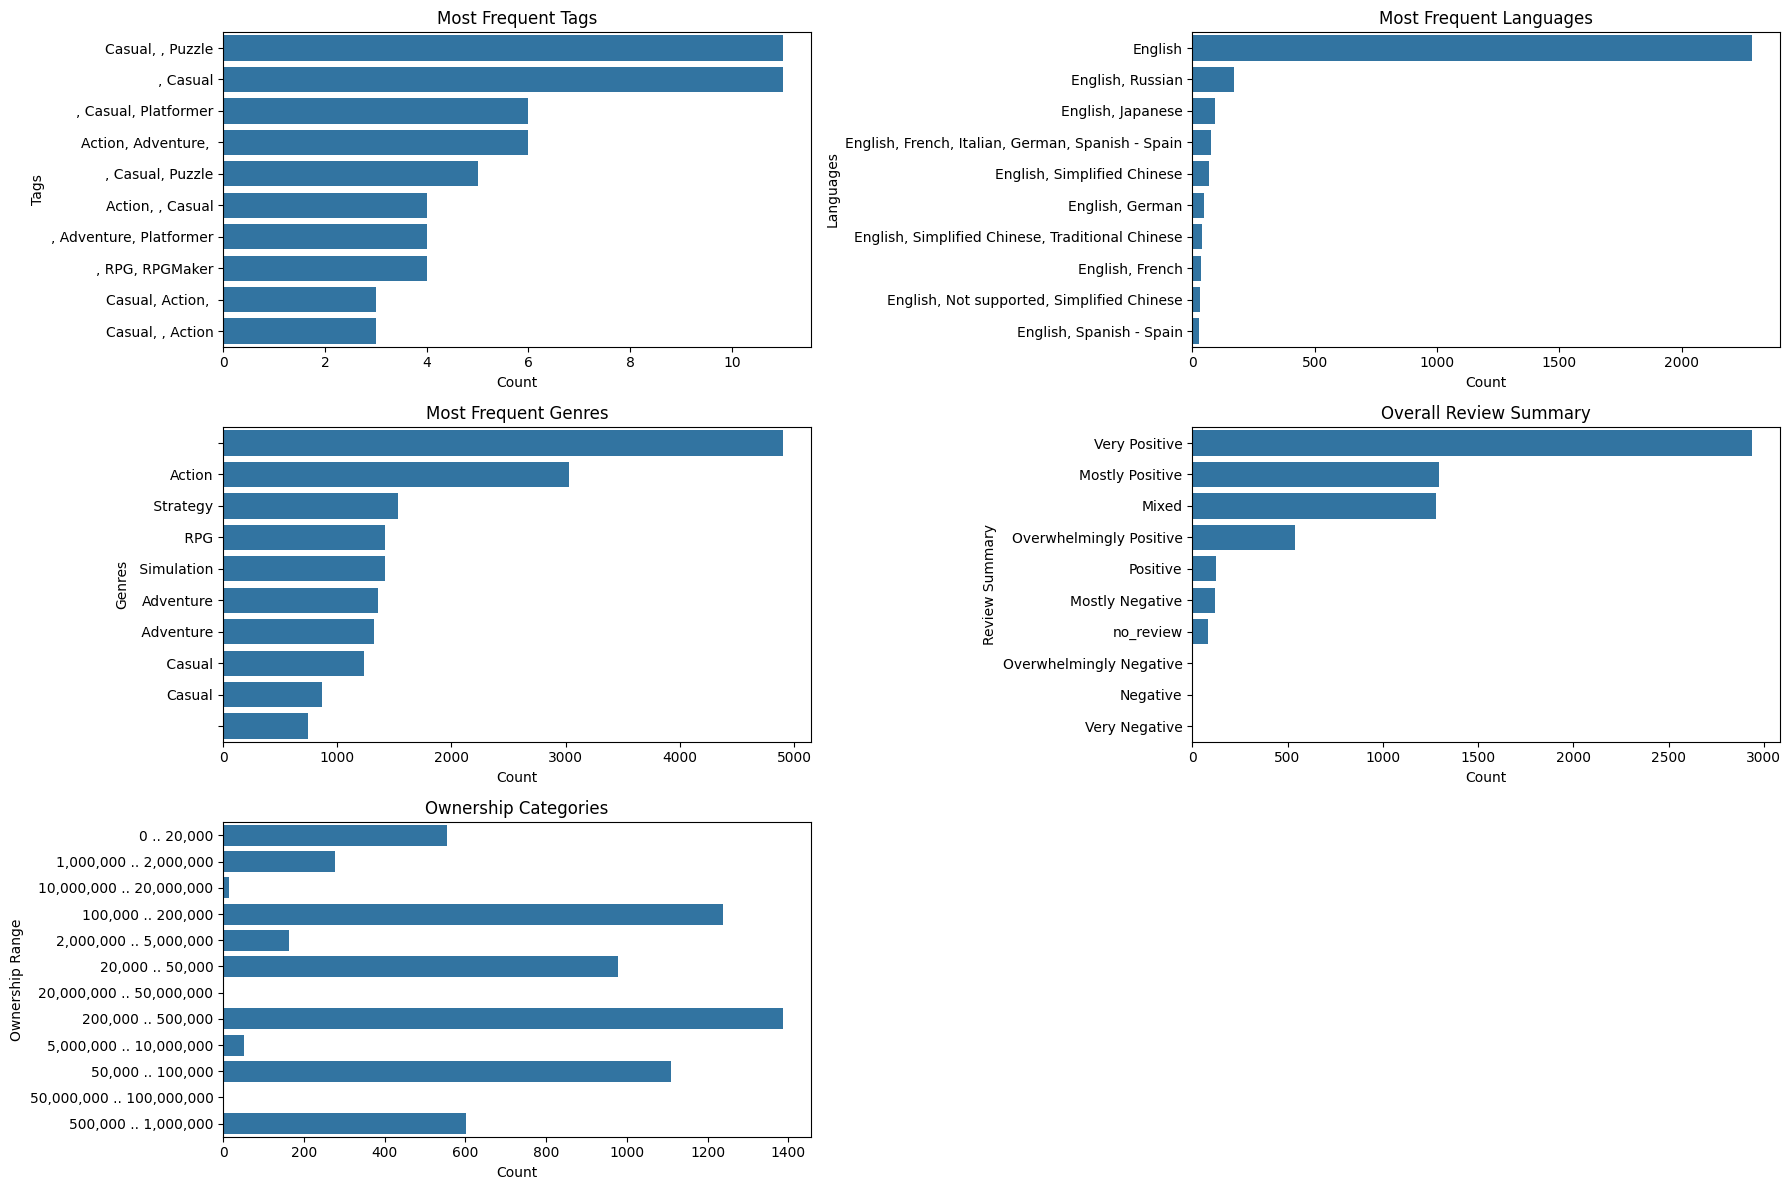

In [9]:
# Most frequent Tags
tag_counts = df['Tags'].explode().value_counts().head(10)  # Assuming 'Tags' is a list-like column

# Most frequent Languages
language_counts = df['Languages'].explode().value_counts().head(10)  # Assuming 'Languages' is a list-like column

# Most frequent Genres
genre_counts = df['Genre'].str.split(',').explode().value_counts().head(10)  # Assuming 'Genre' is a comma-separated string

# Overall Review Summary
review_summary_counts = df['Overall Review Summary'].value_counts()

# Most frequent Owners categories
owners_counts = df['owners'].value_counts().head(10)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Most frequent Tags
sns.barplot(y=tag_counts.index, x=tag_counts.values, ax=axes[0, 0])
axes[0, 0].set_title('Most Frequent Tags')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Tags')

# Most frequent Languages
sns.barplot(y=language_counts.index, x=language_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Most Frequent Languages')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Languages')

# Most frequent Genres from the original column 'Genre'
sns.barplot(y=genre_counts.index, x=genre_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Most Frequent Genres')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Genres')

# Overall Review Summary as in the original column
sns.barplot(y=review_summary_counts.index, x=review_summary_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Overall Review Summary')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Review Summary')

# Most frequent Owners categories from the original column 'owners'
sns.barplot(y=owners_counts.index, x=owners_counts.values, ax=axes[2, 0])
axes[2, 0].set_title('Ownership Categories')
axes[2, 0].set_xlabel('Count')
axes[2, 0].set_ylabel('Ownership Range')

# Removing the empty space in the last subplot
axes[2, 1].remove()

# Adjusting the layout for better readability
plt.tight_layout()
plt.show()


In [10]:
# TOP 10 languages frequencies split individually

language_frequency = df['Languages'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)


print(language_frequency)

English                6371
German                 3036
French                 2935
Russian                2792
Spanish - Spain        2729
Simplified Chinese     2511
Japanese               2217
Italian                2144
Portuguese - Brazil    1809
Korean                 1594
dtype: int64


In [11]:
# Top 20 tags split individually

tag_frequency = df['Tags'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(20)

tag_frequency

,0
Singleplayer,4128
Action,3324
Adventure,3091
Casual,2572
2D,2153
Strategy,1838
Simulation,1669
Multiplayer,1633
RPG,1604
Atmospheric,1562


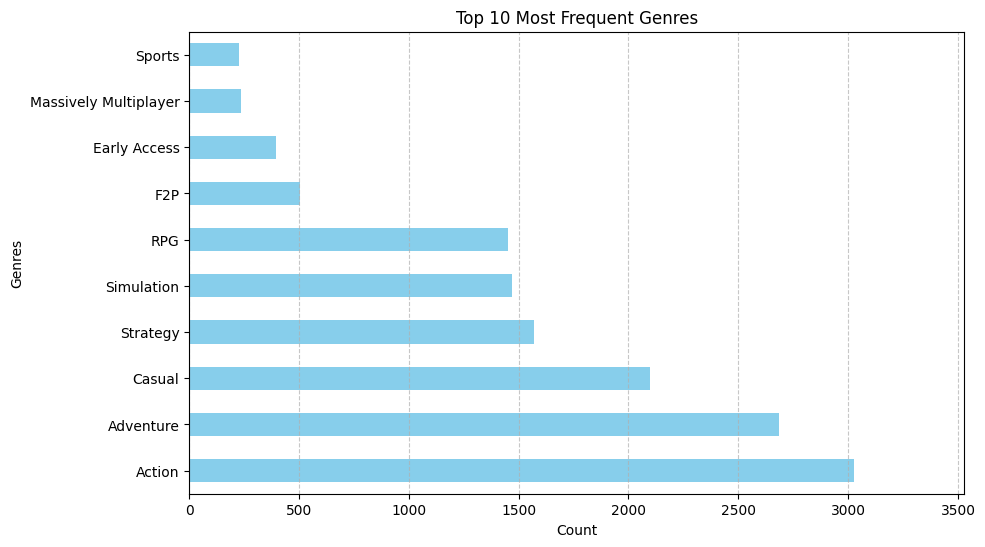

In [12]:
# Zoom on genre

genre_frequency = df['Genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

top_genres = genre_frequency.head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.xlim(0, top_genres.max() + 500)  # Adjust x-axis limit for better spacing
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

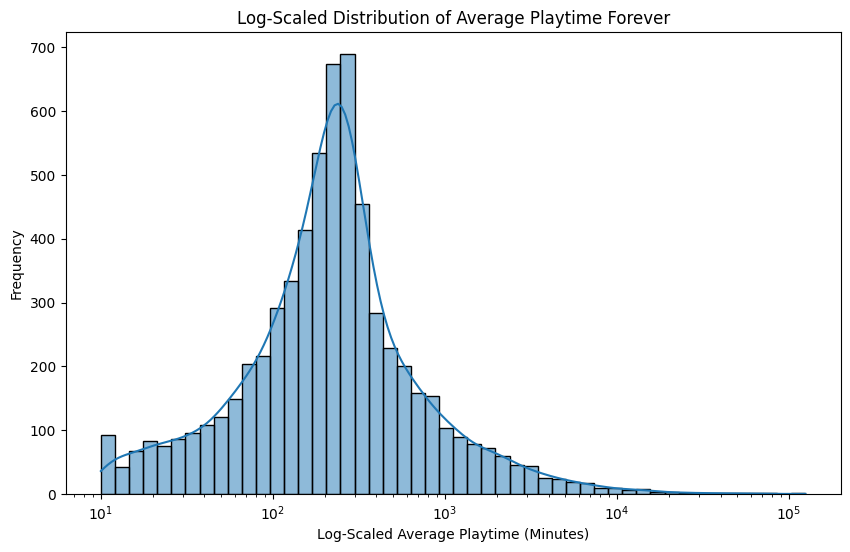

In [13]:
plt.figure(figsize=(10, 6))

# Plotting with a log scale to reduce skewness and highlight outliers better
sns.histplot(df['average_forever_playtime'], bins=50, kde=True, log_scale=(True, False))

# Adding labels and title
plt.title('Log-Scaled Distribution of Average Playtime Forever')
plt.xlabel('Log-Scaled Average Playtime (Minutes)')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

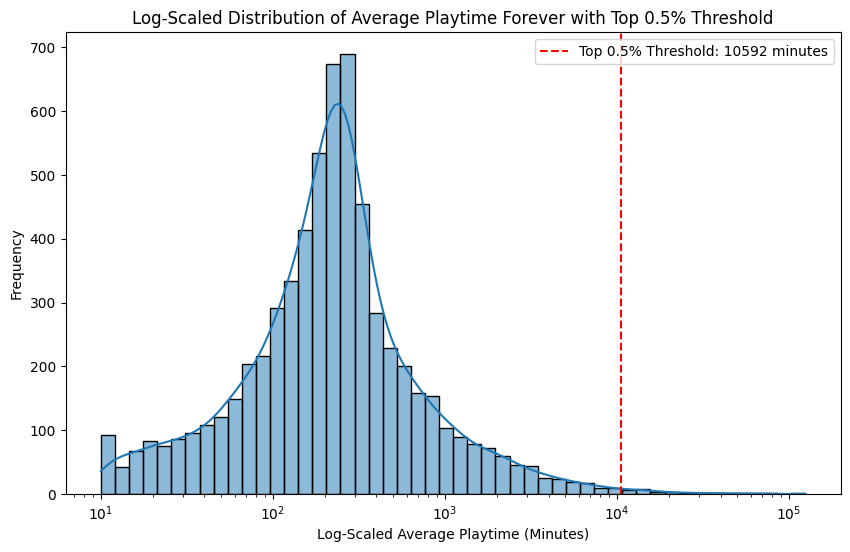

In [14]:
# Calculate the threshold for the top 0.5% of the data
threshold = df['average_forever_playtime'].quantile(0.995)

plt.figure(figsize=(10, 6))
sns.histplot(df['average_forever_playtime'], bins=50, kde=True, log_scale=(True, False))

# Adding a vertical line for the 0.5% threshold
plt.axvline(threshold, color='red', linestyle='--', label=f'Top 0.5% Threshold: {int(threshold)} minutes')

plt.title('Log-Scaled Distribution of Average Playtime Forever with Top 0.5% Threshold')
plt.xlabel('Log-Scaled Average Playtime (Minutes)')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [15]:
# Calculate the 99.5th percentile value for the 'all_time_peak' column
thresholds = df['all_time_peak'].quantile(0.99)

df = df[df['all_time_peak'] < thresholds]

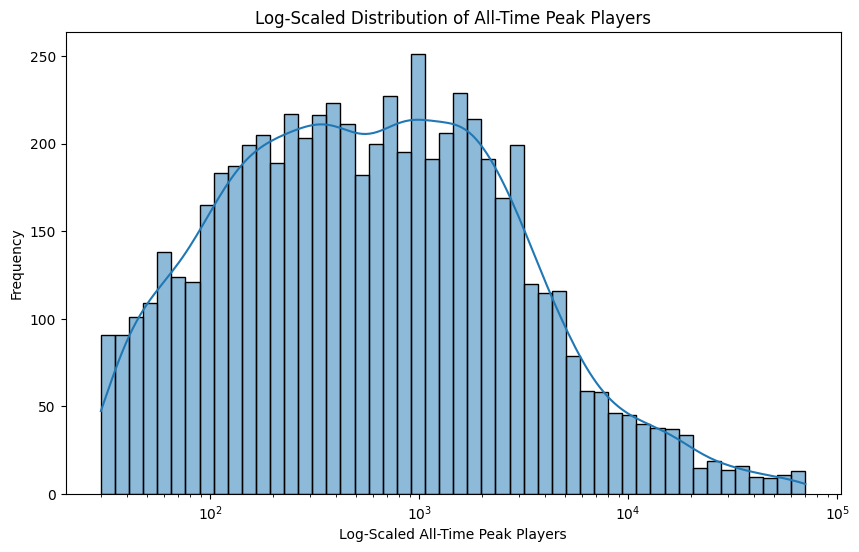

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(df['all_time_peak'], bins=50, kde=True, log_scale=(True, False))

plt.title('Log-Scaled Distribution of All-Time Peak Players')
plt.xlabel('Log-Scaled All-Time Peak Players')
plt.ylabel('Frequency')

plt.show()

In [17]:
threshold = df['average_forever_playtime'].quantile(0.99)
df = df[df['average_forever_playtime'] < threshold]

df.shape

(6257, 16)

### Bivariate Analysis

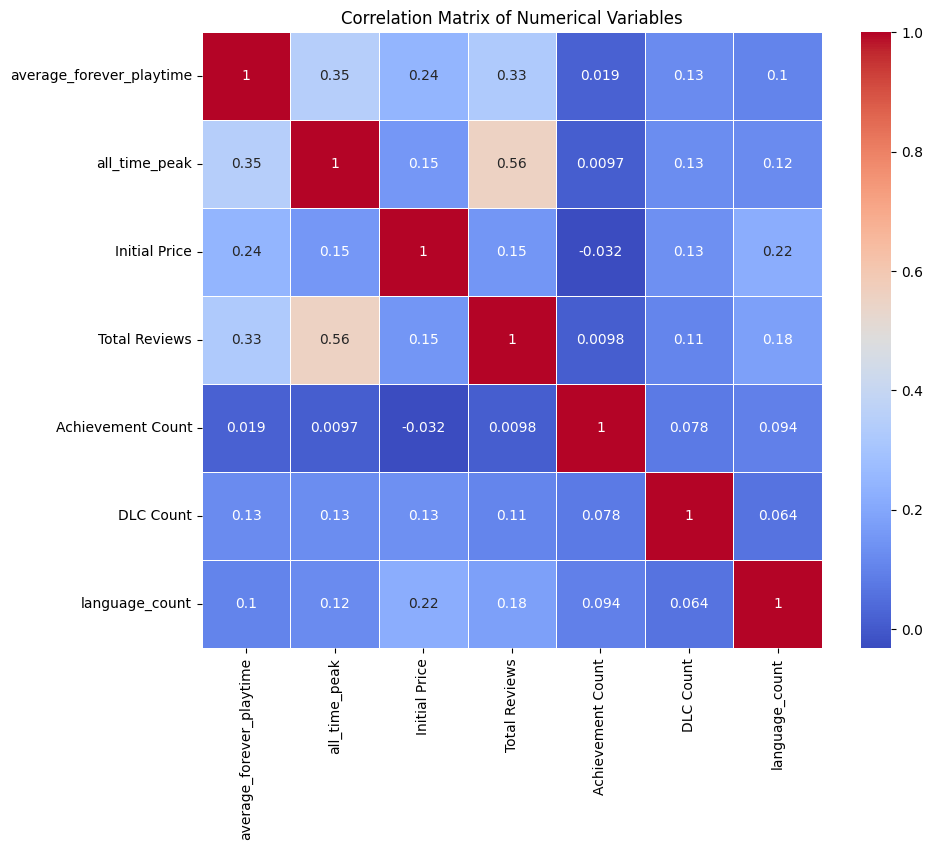

In [37]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['appid']).columns

correlation_matrix = df[numerical_columns].corr()

# Plotting the updated correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

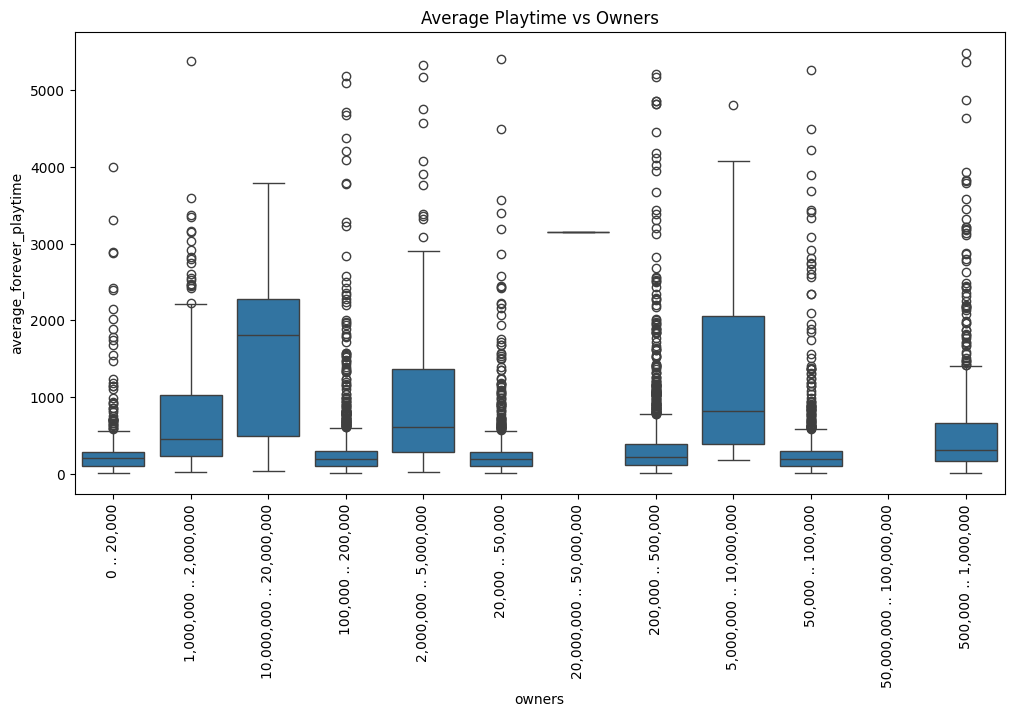

In [19]:
# Plotting the influence of owners amount for average playtime
plt.figure(figsize=(12, 6))
sns.boxplot(x='owners', y='average_forever_playtime', data=df)
plt.xticks(rotation=90)
plt.title('Average Playtime vs Owners')
plt.show()


<ipython-input-38-1cb63cfb4c77>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overall Review Summary', y='average_forever_playtime', data=df, palette=palette_reversed)
<ipython-input-38-1cb63cfb4c77>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_summary_means = df.groupby('Overall Review Summary')['average_forever_playtime'].mean()


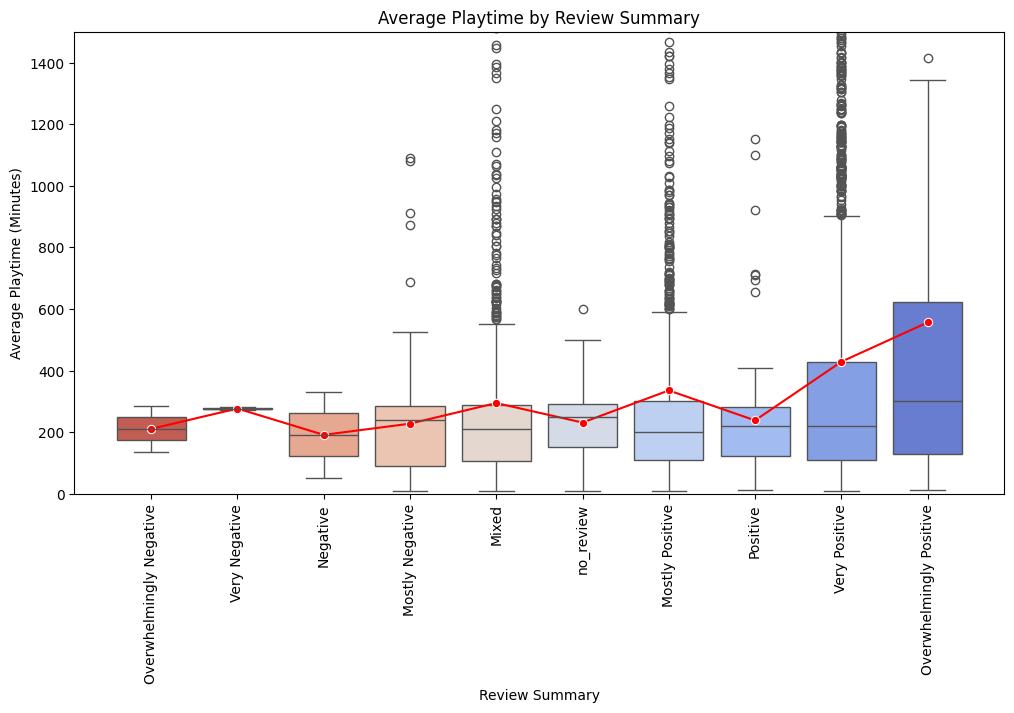

In [38]:
# Define the custom order for 'Overall Review Summary'
ordered_review_summary = [
    'Overwhelmingly Negative', 'Very Negative', 'Negative', 'Mostly Negative',
    'Mixed', 'no_review', 'Mostly Positive', 'Positive', 'Very Positive', 'Overwhelmingly Positive'
]

# Update the dataframe to use the specified order
df['Overall Review Summary'] = pd.Categorical(df['Overall Review Summary'], categories=ordered_review_summary, ordered=True)

# Define the reversed color palette
palette_reversed = sns.color_palette("coolwarm_r", len(ordered_review_summary))  # Reversed color palette

# Plot the boxplot with custom colors
plt.figure(figsize=(12, 6))
sns.boxplot(x='Overall Review Summary', y='average_forever_playtime', data=df, palette=palette_reversed)
plt.xticks(rotation=90)
plt.ylim(0, 1500)

# Calculate the mean playtime for each review category
review_summary_means = df.groupby('Overall Review Summary')['average_forever_playtime'].mean()

# Plot the trend line in red
sns.lineplot(x=ordered_review_summary, y=review_summary_means, marker='o', color='red')

# Set plot titles and labels
plt.title('Average Playtime by Review Summary')
plt.xlabel('Review Summary')
plt.ylabel('Average Playtime (Minutes)')

plt.show()


In [21]:
# Influence of language count on avg playtime

df['language_count'] = df['Languages'].apply(lambda x: len(str(x).split(',')))

correlation = df[['language_count', 'average_forever_playtime']].corr()
print("Correlation between Language Count and Average Playtime:")
print(correlation)



Correlation between Language Count and Average Playtime:
                          language_count  average_forever_playtime
language_count                  1.000000                  0.104217
average_forever_playtime        0.104217                  1.000000


In [22]:
# Let's count the amount of separate genres
individual_genres = df['Genre'].str.split(',').explode().str.strip().nunique()
individual_genres

24

In [23]:
# Let's see which individual genres display the highest average playtime

# Split the genres into individual entries and explode them into separate rows
df_cleaned = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df_cleaned['Genre'] = df_cleaned['Genre'].str.strip()

# Group the data by unique 'Genre' and calculate the average playtime
avg_playtime_per_unique_genre = df_cleaned.groupby('Genre')['average_forever_playtime'].mean().reset_index()

# Sort by average playtime in descending order and display the top 10
avg_playtime_per_unique_genre_sorted = avg_playtime_per_unique_genre.sort_values(by='average_forever_playtime', ascending=False)
top_10_genres = avg_playtime_per_unique_genre_sorted.head(30)

print(top_10_genres)


                    Genre  average_forever_playtime
6     Design&Illustration               1482.000000
10        GameDevelopment               1469.250000
20              Utilities               1321.142857
3      Animation&Modeling                943.285714
21        VideoProduction                926.000000
23          WebPublishing                879.666667
12  Massively Multiplayer                616.339367
4         AudioProduction                580.500000
7            Early Access                571.765333
8               Education                545.200000
18               Strategy                519.235140
13                    RPG                510.383738
15             Simulation                509.617379
14                 Racing                418.166667
0                                        372.518773
1                  Action                365.682615
2               Adventure                356.002287
9                     F2P                353.799591
17          

In [24]:
# # Let's see which individual tags display the highest average playtime

# Split the 'Tags' column into individual entries and explode them into separate rows
df_cleaned_tags = df.assign(Tags=df['Tags'].str.split(',')).explode('Tags')

# Remove any leading/trailing whitespace from tags
df_cleaned_tags['Tags'] = df_cleaned_tags['Tags'].str.strip()

tag_counts = df_cleaned_tags['Tags'].value_counts()

# Get the tags that appear at least 10 times
tags_with_min_10 = tag_counts[tag_counts >= 10].index

# Filter the dataframe to include only these tags
df_filtered_tags = df_cleaned_tags[df_cleaned_tags['Tags'].isin(tags_with_min_10)]

avg_playtime_per_filtered_tag = df_filtered_tags.groupby('Tags')['average_forever_playtime'].mean().reset_index()

avg_playtime_per_filtered_tag_sorted = avg_playtime_per_filtered_tag.sort_values(by='average_forever_playtime', ascending=False)

avg_playtime_per_filtered_tag_sorted.head(20)


,Tags,average_forever_playtime
170,Job Simulator,1258.818182
358,Utilities,1126.266667
182,Looter Shooter,1097.666667
346,Transportation,1045.000000
299,Software,965.500000
161,Idler,944.838384
50,Card Battler,929.706897
94,Deckbuilding,897.821429
220,Naval Combat,895.041667
181,Loot,873.166667


In [25]:
# Let's see which combination of tags and genres display the highest average playtime



# Step 1: Split Tags into individual entries and explode them into separate rows
df_cleaned_tags_genre = df.assign(Tags=df['Tags'].str.split(',')).explode('Tags')

# Step 2: Remove any leading/trailing whitespace from Tags
df_cleaned_tags_genre['Tags'] = df_cleaned_tags_genre['Tags'].str.strip()

# Step 3: Filter out rows where Genre contains multiple entries (retain only single genres)
df_cleaned_tags_genre = df_cleaned_tags_genre[df_cleaned_tags_genre['Genre'].str.contains(',') == False]

# Step 4: Create a combination of 'Tags' and 'Genre' to find the average playtime for each combination
df_cleaned_tags_genre['Tag_Genre_Combo'] = df_cleaned_tags_genre['Tags'] + " | " + df_cleaned_tags_genre['Genre']

# Step 5: Group by the combination of 'Tags' and 'Genre' and calculate the average playtime
avg_playtime_per_tag_genre_combo = df_cleaned_tags_genre.groupby('Tag_Genre_Combo')['average_forever_playtime'].mean().reset_index()

# Step 6: Sort by average playtime in descending order
avg_playtime_per_tag_genre_combo_sorted = avg_playtime_per_tag_genre_combo.sort_values(by='average_forever_playtime', ascending=False)

# Step 7: Filter to show only combinations that appear at least 3 times
combo_counts = df_cleaned_tags_genre['Tag_Genre_Combo'].value_counts()
combos_with_min_3 = combo_counts[combo_counts >= 3].index

df_filtered_combos_min_3 = df_cleaned_tags_genre[df_cleaned_tags_genre['Tag_Genre_Combo'].isin(combos_with_min_3)]

# Step 8: Calculate the average playtime for filtered combinations with at least 3 occurrences
avg_playtime_per_filtered_combo_min_3 = df_filtered_combos_min_3.groupby('Tag_Genre_Combo')['average_forever_playtime'].mean().reset_index()

# Step 9: Sort the filtered combinations by average playtime and display the top 20 results
avg_playtime_per_filtered_combo_min_3_sorted = avg_playtime_per_filtered_combo_min_3.sort_values(by='average_forever_playtime', ascending=False)
top_results_min_3 = avg_playtime_per_filtered_combo_min_3_sorted.head(20)

# Display the top combinations with at least 3 occurrences
print(top_results_min_3)




                     Tag_Genre_Combo  average_forever_playtime
186       Family Friendly | Strategy               2631.666667
404   Resource Management | Strategy               2468.333333
150                    Dark | Action               2384.333333
108          City Builder | Strategy               2317.000000
487              Survival | Strategy               2269.428571
253             Isometric | Strategy               1871.333333
319          Online Co-Op | Strategy               1846.250000
89               Cartoony | Strategy               1845.500000
388  Real-Time with Pause | Strategy               1682.666667
99     Character Customization | RPG               1642.333333
20                     2D | Strategy               1602.500000
51              Adventure | Strategy               1548.142857
118                 Co-op | Strategy               1541.333333
491              Team-Based | Action               1538.333333
511         Tower Defense | Strategy               1509

In [26]:
# F2P vs non-F2P analysis

# Creating a new column to classify games as "F2P" or "Non-F2P"
df['F2P_Status'] = df['Genre'].str.contains('F2P', case=False).replace({True: 'F2P', False: 'Non-F2P'})

# Calculating average playtime for F2P and Non-F2P games
avg_playtime_f2p = df.groupby('F2P_Status')['average_forever_playtime'].mean().reset_index()

avg_playtime_f2p


,F2P_Status,average_forever_playtime
0,F2P,353.799591
1,Non-F2P,385.425624


In [27]:
# Multiplayer vs Single-player analysis


# Define a function to classify games based on tags
def classify_game_type(tags):
    tags_list = tags.split(', ')
    if any(tag in tags_list for tag in ['Multiplayer', 'Co-op', 'PvP', 'Local Multiplayer', 'Online Co-Op', 'Massively Multiplayer']):
        return 'Multiplayer'
    else:
        return 'Singleplayer/Other'

df_cleaned['Game Type'] = df_cleaned['Tags'].apply(classify_game_type)

avg_playtime_comparison = df_cleaned.groupby('Game Type')['average_forever_playtime'].mean().reset_index()

print(avg_playtime_comparison)


            Game Type  average_forever_playtime
0         Multiplayer                486.993626
1  Singleplayer/Other                360.174561


In [28]:
# RPG vs Non-RPG analysis

# Define RPG-related tags
rpg_tags = [
    'RPG', 'Role-Playing', 'Action RPG', 'Tactical RPG', 'JRPG', 'RPGMaker',
    'Fantasy', 'Open World RPG', 'Turn-Based RPG', 'Action-Adventure RPG',
    'RPG Strategy'
]

# Function to classify games as RPG or Non-RPG
def classify_rpg(tags):
    tags_list = tags.split(', ')
    if any(tag in tags_list for tag in rpg_tags):
        return 'RPG'
    else:
        return 'Non-RPG'

df_cleaned['RPG Type'] = df_cleaned['Tags'].apply(classify_rpg)

avg_playtime_rpg_comparison = df_cleaned.groupby('RPG Type')['average_forever_playtime'].mean().reset_index()

print(avg_playtime_rpg_comparison)

  RPG Type  average_forever_playtime
0  Non-RPG                352.174964
1      RPG                492.442355


In [29]:
# PvP vs no-PvP analysis

pvp_tags = ['PvP', 'Player versus Player']

# Function to classify games as PvP or No PvP
def classify_pvp(tags):
    tags_list = tags.split(', ')
    if any(tag in tags_list for tag in pvp_tags):
        return 'PvP'
    else:
        return 'No PvP'

# Apply the classification to the DataFrame
df_cleaned['PvP Type'] = df_cleaned['Tags'].apply(classify_pvp)

# Calculate average playtime for each PvP category
avg_playtime_pvp_comparison = df_cleaned.groupby('PvP Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_pvp_comparison)

  PvP Type  average_forever_playtime
0   No PvP                390.699256
1      PvP                557.505848


In [30]:
# Moddable vs non-Moddable analysis

# Define the moddable tag
moddable_tag = 'Moddable'

# Function to classify games as Moddable or Non-Moddable
def classify_moddable(tags):
    tags_list = tags.split(', ')
    if moddable_tag in tags_list:
        return 'Moddable'
    else:
        return 'Non-Moddable'

# Apply the classification to the DataFrame
df_cleaned['Moddable Type'] = df_cleaned['Tags'].apply(classify_moddable)

# Calculate average playtime for each moddable category
avg_playtime_moddable_comparison = df_cleaned.groupby('Moddable Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_moddable_comparison)

  Moddable Type  average_forever_playtime
0      Moddable                803.242623
1  Non-Moddable                389.440468


In [31]:
# Open-world vs non-Open-World analysis

# Function to classify games as Open World or Non-Open World
def classify_open_world(tags):
    tags_list = tags.split(', ')
    if any("Open World" in tag for tag in tags_list):
        return 'Open World'
    else:
        return 'Non-Open World'

# Apply the classification to the DataFrame
df_cleaned['Open World Type'] = df_cleaned['Tags'].apply(classify_open_world)

# Calculate average playtime for each open world category
avg_playtime_open_world_comparison = df_cleaned.groupby('Open World Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_open_world_comparison)

  Open World Type  average_forever_playtime
0  Non-Open World                367.439509
1      Open World                589.912113


In [32]:
# Achievement vs no-Achievement

# Function to classify games based on achievement count
def classify_achievements(count):
    if count == 0:
        return '0 Achievements'
    else:
        return 'Any Achievement'

# Apply the classification to the DataFrame
df_cleaned['Achievement Type'] = df_cleaned['Achievement Count'].apply(classify_achievements)

# Calculate average playtime for each achievement category
avg_playtime_achievement_comparison = df_cleaned.groupby('Achievement Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_achievement_comparison)

  Achievement Type  average_forever_playtime
0   0 Achievements                357.418098
1  Any Achievement                414.898174


In [33]:
# ARPG vs other genres

# Define the tags to check for
action_rpg_tags = 'Action RPG'
hack_n_slash_tags = 'Hack and Slash'

# Function to classify games as Action RPG/Hack and Slash or Other
def classify_action_hack(tags):
    tags_list = tags.split(', ')
    if action_rpg_tags in tags_list or hack_n_slash_tags in tags_list:
        return 'Action RPG / Hack and Slash'
    else:
        return 'Other'

# Apply the classification to the DataFrame
df_cleaned['Game Type'] = df_cleaned['Tags'].apply(classify_action_hack)

# Calculate average playtime for each game type category
avg_playtime_action_hack_comparison = df_cleaned.groupby('Game Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_action_hack_comparison)

                     Game Type  average_forever_playtime
0  Action RPG / Hack and Slash                528.891039
1                        Other                392.683005


In [34]:
# Soundtrack bundle analysis

#Function to classify games based on the presence of 'soundtrack' in DLC names
def classify_soundtrack_dlc(dlc_names):
    if pd.isna(dlc_names):
        return 'No Soundtrack DLC'
    elif 'soundtrack' in dlc_names.lower():
        return 'Has Soundtrack DLC'
    else:
        return 'No Soundtrack DLC'

# Apply the classification to the DataFrame
df_cleaned['Soundtrack DLC Type'] = df_cleaned['DLC Names'].apply(classify_soundtrack_dlc)

# Calculate average playtime for each soundtrack DLC category
avg_playtime_soundtrack_comparison = df_cleaned.groupby('Soundtrack DLC Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_soundtrack_comparison)

  Soundtrack DLC Type  average_forever_playtime
0  Has Soundtrack DLC                476.614564
1   No Soundtrack DLC                381.172949


In [35]:
# Bundle vs no-Bundle

# Function to classify games based on the presence of 'bundle' in DLC names
def classify_bundle(dlc_names):
    if pd.isna(dlc_names):
        return 'No Bundle'
    elif 'bundle' in dlc_names.lower():
        return 'Has Bundle'
    else:
        return 'No Bundle'

# Apply the classification to the DataFrame
df_cleaned['Bundle Type'] = df_cleaned['DLC Names'].apply(classify_bundle)

# Calculate average playtime for each bundle category
avg_playtime_bundle_comparison = df_cleaned.groupby('Bundle Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_bundle_comparison)

  Bundle Type  average_forever_playtime
0  Has Bundle                928.500000
1   No Bundle                399.421471


In [36]:
# Mature level analysis


# Define tags for each category
cute_tags = ['Cute', 'Whimsical', 'Wholesome', 'Family Friendly', 'Charming', 'Adorable']
mature_tags = ['Mature', 'Violent', 'Horror', 'Dark', 'Gore', 'Adult', 'Nudity']

# Function to classify games based on cute or mature tags
def classify_cute_mature(tags):
    tags_list = tags.split(', ')
    if any(tag in tags_list for tag in cute_tags):
        return 'Cute'
    elif any(tag in tags_list for tag in mature_tags):
        return 'Mature'
    else:
        return 'Other'

# Apply the classification to the DataFrame
df_cleaned['Cute Mature Type'] = df_cleaned['Tags'].apply(classify_cute_mature)

# Calculate average playtime for each cute/mature category
avg_playtime_cute_mature_comparison = df_cleaned.groupby('Cute Mature Type')['average_forever_playtime'].mean().reset_index()

# Display the results
print(avg_playtime_cute_mature_comparison)

  Cute Mature Type  average_forever_playtime
0             Cute                424.656571
1           Mature                343.098157
2            Other                417.141666
